# Import Libraries


In [4]:
# Upgrade matplotlib & folium
%pip install matplotlib --upgrade
%pip install folium --upgrade

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline
import json
import requests
import folium
from folium.plugins import FastMarkerCluster, HeatMap

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load Datasets

In [5]:
customers = pd.read_csv("/assessment_dataset/customers_dataset.csv")
geolocations = pd.read_csv("/assessment_dataset/geolocation_dataset.csv")
order_items = pd.read_csv("/assessment_dataset/order_items_dataset.csv")
order_payments = pd.read_csv("/assessment_dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("/assessment_dataset/order_reviews_dataset.csv")
orders = pd.read_csv("/assessment_dataset/orders_dataset.csv")
products = pd.read_csv("/assessment_dataset/products_dataset.csv")
sellers = pd.read_csv("/assessment_dataset/sellers_dataset.csv")
category_translation = pd.read_csv("/assessment_dataset/product_category_name_translation.csv")

# Inspect Data

In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
geolocations.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [14]:
category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Data Cleaning

**Removing columns**

In [15]:
# Dropping columns in order reviews
order_reviews.drop(columns = ['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], inplace=True, axis=1)

# Dropping columns in products
products.drop(columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True, axis=1)

**Data Overview**

In [16]:
# Examine columns
tables = [customers, sellers, order_reviews, order_items, products, geolocations, category_translation, orders, order_payments]

# Dataset titles
titles = ["Customers", "Sellers", "Order Reviews", "Order Items", "Products", "Geolocations", "Category translation", "Orders", "Payments"]

# Creating an empty dataframe
data_summary = pd.DataFrame({})

# Filling data_summary with new columns
data_summary['Dataset']= titles
data_summary['Columns'] = [', '.join([col for col, null in table.isnull().sum().items() ]) for table in tables]
data_summary['Total_rows']= [table.shape[0] for table in tables]
data_summary['Total_cols']= [table.shape[1] for table in tables]
data_summary['Total_duplicate']= [len(table[table.duplicated()]) for table in tables]
data_summary['Total_null']= [table.isnull().sum().sum() for table in tables]
data_summary['Null_cols'] = [', '.join([col for col, null in table.isnull().sum().items() if null > 0]) for table in tables]

# Setting a style for the background cells in gradient colors
data_summary.style.background_gradient(cmap='YlGnBu')

,Dataset,Columns,Total_rows,Total_cols,Total_duplicate,Total_null,Null_cols
0,Customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,Sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
2,Order Reviews,"review_id, order_id, review_score",99224,3,0,0,
3,Order Items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
4,Products,"product_id, product_category_name, product_weight_g",32951,3,0,612,"product_category_name, product_weight_g"
5,Geolocations,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
6,Category translation,"product_category_name, product_category_name_english",71,2,0,0,
7,Orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
8,Payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,


**Duplicated & null values data**

In [17]:
# Dropping duplicates on geolocations data
geolocations.drop_duplicates(inplace = True)

In [18]:
# Replacing null values in product_weight_g column with the mean
products['product_weight_g'].fillna(value = products['product_weight_g'].mean(), inplace = True)

# Replacing null values in product_category_name column with 'Uncategorized'
products['product_category_name'].fillna(value = 'Uncategorized', inplace = True)

In [19]:
# Information checking
for i in tables:
    i.info()
    print("-"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   ob

# Data Preparation

Merging Dataframes

In [20]:
# Merging all dataframes
merged_df = orders.merge(order_items, on='order_id')
merged_df = merged_df.merge(order_payments, on='order_id')
merged_df = merged_df.merge(order_reviews, on='order_id')
merged_df = merged_df.merge(products, on='product_id')
merged_df = merged_df.merge(customers, on='customer_id')
merged_df = merged_df.merge(sellers, on='seller_id')
merged_df = merged_df.merge(category_translation, on='product_category_name')

In [21]:
merged_df.shape

(115609, 30)

In [22]:
# Show merged dataframe
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name,product_weight_g,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,500.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,500.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,500.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,500.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,500.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP,housewares


In [23]:
# Checking datatypes
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   order_item_id                  115609 non-null  int64  
 9   product_id                     115609 non-null  object 
 10  seller_id                      115609 non-null  object 
 11  shipping_limit_date            115609 non-null  object 
 12  price                         

In [24]:
# Converting time columns to datetime
time_columns = ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']

merged_df[time_columns] = merged_df[time_columns].apply(pd.to_datetime)

# Exploratory Data Analysis (EDA)

**Number of orders by status**

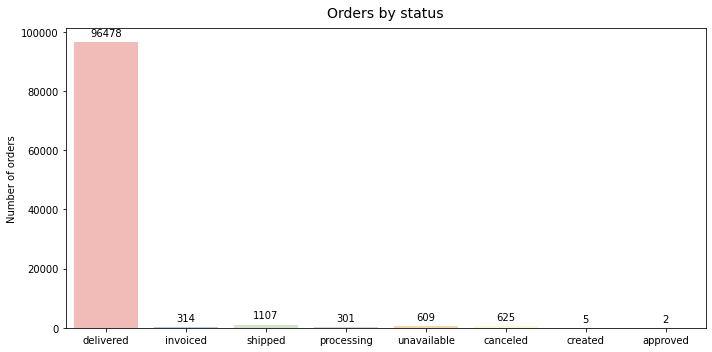

In [25]:
# Creating a plot to show number of orders by order_status
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(ax = ax, x = 'order_status', data = orders, palette = 'Pastel1').set(xlabel = None)
ax.bar_label(ax.containers[0], padding = 4)
plt.title('Orders by status', fontdict = {'fontsize': 14}, pad = 10.5)
plt.ylabel('Number of orders')

plt.tight_layout()

the number of delivered orders is so high compared to the rest

**Number of orders per state**

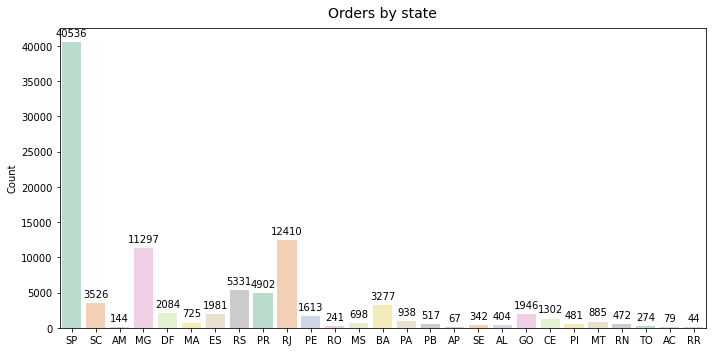

In [26]:
# Deleting duplicate order_id in a new dataframe (copy of merged_df)
data = merged_df.copy(deep = True)
data.drop_duplicates(subset = ["order_id"], inplace = True)

# Creating a plot to show number of orders by state
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(ax = ax, x = data['customer_state'], palette = 'Pastel2').set(xlabel = None)
ax.bar_label(ax.containers[0], padding = 4)
plt.title('Orders by state', fontdict = {'fontsize': 14}, pad = 10.5)
plt.ylabel('Count')

plt.tight_layout()

most orders come from customers located in the states of Säo Paulo (SP), Rio de  aneiro (RJ) and Minas Gerais (MG), while Roraima (RR), Amapá (AP) and Acre (AC) are the states with the fewest orders.

**Revenue over time**

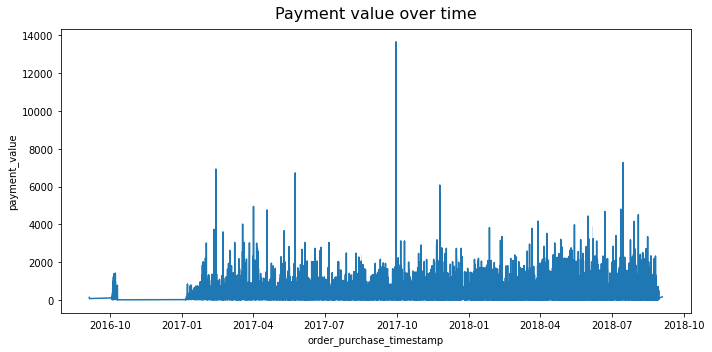

In [27]:
#Creating a plot to show payment value over time
plt.figure(figsize = (10, 5))
sns.lineplot(x = merged_df['order_purchase_timestamp'], y = merged_df['payment_value'], palette = 'viridis')
plt.title('Payment value over time', fontdict = {'fontsize': 16}, pad = 10.5)

plt.tight_layout()

Since the date column used to create the chart contains data for the exact time and day each order was created, a lot of noise appears on the graph.

In [28]:
#Creating other copy of merged_df 
data_2 = merged_df.copy(deep = True)

#Setting a index before resample the dataframe to month and week level
data_2 = data_2.set_index('order_purchase_timestamp')

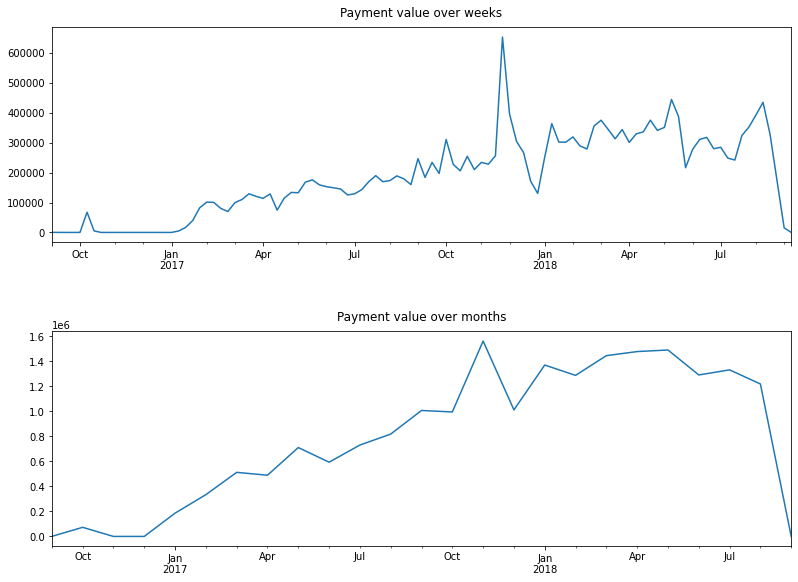

In [29]:
#Plot resampled dataframe
plt.figure(figsize = (12, 9))

#First plot
plt.subplot(2,1,1)
data_2['payment_value'].resample('W').sum().plot()
plt.title('Payment value over weeks', fontdict = {'fontsize': 12}, pad = 10.5)
plt.xlabel(None)

#Second plot
plt.subplot(2,1,2)
data_2['payment_value'].resample('M').sum().plot()
plt.title('Payment value over months', fontdict = {'fontsize': 12}, pad = 10.5)
plt.xlabel(None)

plt.tight_layout(pad = 4)

used the resample option, a method for frequency conversion and resampling of time data. Thus we can see more clearly that sales have grown over time, with a pronounced peak at the end of 2017

**Number of orders over time**

In [30]:
#Setting a index before resample the dataframe to month level
data = data.set_index('order_purchase_timestamp')

Text(0, 0.5, 'Count')

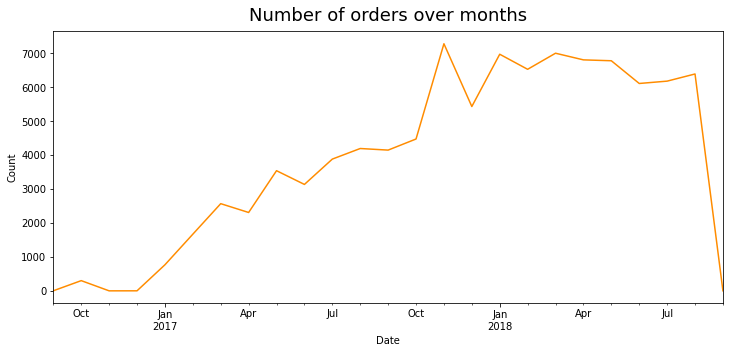

In [31]:
#Plot resampled dataframe
plt.figure(figsize = (12, 5))

data['order_id'].resample('M').count().plot(color = '#FF8C00')
plt.title('Number of orders over months', fontdict = {'fontsize': 18}, pad = 10.5)
plt.xlabel('Date')
plt.ylabel('Count')

the number of orders follows a very similar trend to revenue, with a peak at the end of 2017 and a final drop, which is due to the lack of 2018 data.

**Distribution of the payment value**

Text(0.5, 1.0, 'Distribution of payment value')

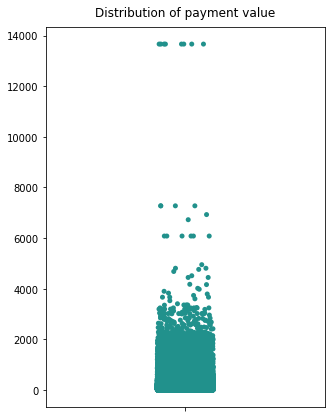

In [32]:
#Plot histogram to show distribution of payment value
plt.figure(figsize = (5, 7))

sns.stripplot(y = merged_df['payment_value'], palette = 'viridis').set(xlabel = None, ylabel = None)
plt.title('Distribution of payment value', fontdict = {'fontsize': 12}, pad = 10.5)

The value of payments is concentrated below 2,000

**Type of payment most commonly used**

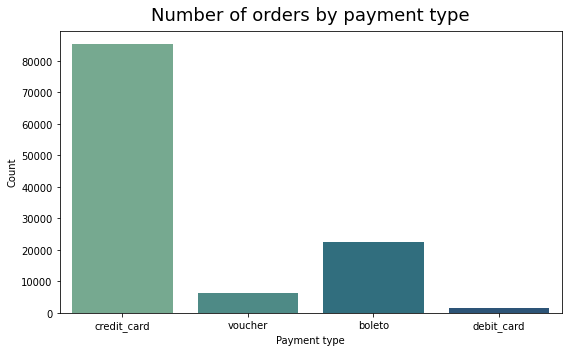

In [33]:
#Creating a countplot to show which type of payment is most commonly used
plt.figure(figsize = (8, 5))

sns.countplot(x = 'payment_type', data = merged_df, palette = 'crest')
plt.title('Number of orders by payment type', fontdict = {'fontsize': 18}, pad = 10.5)
plt.xlabel('Payment type')
plt.ylabel('Count')

plt.tight_layout()

Credit card is the most used type of payment, followed by boleto.

**Top categories by payment value and review rating**

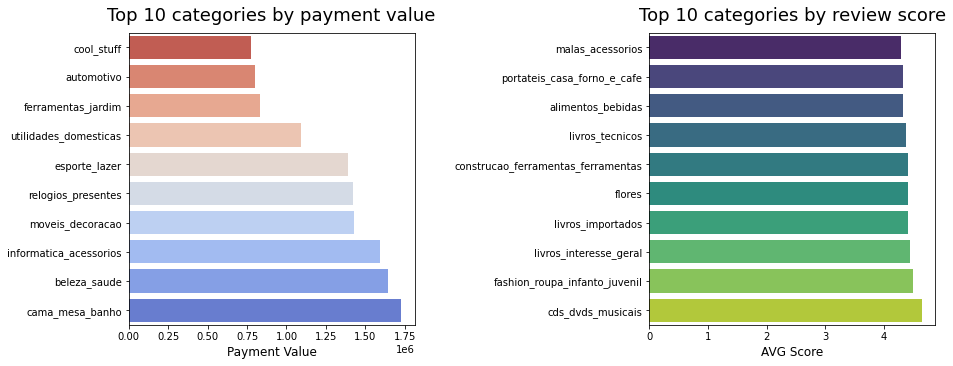

In [34]:
plt.figure(figsize = (14, 6))

#Plot 1: Top categories by payment value
plt.subplot(1,2,1)

##Calculate sum of payment value for each category
merged_groups = merged_df.groupby(['product_category_name'], as_index = False).sum().sort_values('payment_value').tail(10)

##Create bar plot
sns.barplot(data = merged_groups, x = 'payment_value', y = 'product_category_name', palette = 'coolwarm_r')

##Setting some visual options
plt.ylabel(None)
plt.xlabel('Payment Value', fontdict = {'fontsize': 12})
plt.title('Top 10 categories by payment value', fontdict = {'fontsize': 18}, pad = 12)


#Plot 2: Top categories by review score
plt.subplot(1,2,2)

##Calculate avg review score for each category
merged_groups_2 = merged_df.groupby(['product_category_name'], as_index = False).mean().sort_values('review_score').tail(10)

##Create bar plot
sns.barplot(data = merged_groups_2, x = 'review_score', y = 'product_category_name', palette = 'viridis')

##Setting some visual options
plt.ylabel(None)
plt.xlabel('AVG Score', fontdict = {'fontsize': 12})
plt.title('Top 10 categories by review score', fontdict={'fontsize': 18}, pad = 12)


plt.tight_layout(pad = 4)

cama mesa banho, beleza saude and informatica acessorios are the categories with the highest revenues. On the other hand, cds dvds musicais and fashion roupa infanto juvenil are the categories most highly rated by consumers.

# Geoanalysis

**Transform timestamp**

In [35]:
# Merging orders customers
df_orders = orders.merge(customers, how='left', on='customer_id')

# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# Extracting attributes for purchase date - Year and Month
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,2017,11,Nov,201711,20171118,18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,2018,2,Feb,201802,20180213,13,1,Tue,21,Night


**Use Brazilians APIs for geolocation info**

In [36]:
# Merging orders and order_items
df_orders_items = df_orders.merge(order_items, how='left', on='order_id')

# Using the API to bring the region to the data
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop('regiao', axis=1, inplace=True)
br_info.drop_duplicates(inplace=True)

# Threting geolocations outside brazilian map

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_prep = geolocations[geolocations.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_prep = geo_prep[geo_prep.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng <=  -34.79314722]
geo_group = geo_prep.groupby(by='geolocation_zip_code_prefix', as_index=False).min()

# Merging all the informations
df_orders_items = df_orders_items.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
df_orders_items = df_orders_items.merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')
df_orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,id,sigla,nome,nome_regiao,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,35,SP,São Paulo,Sudeste,3149.0,-23.583885,-46.587473,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,22.76,29,BA,Bahia,Nordeste,47813.0,-12.945892,-45.016313,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.22,52,GO,Goiás,Centro-Oeste,75265.0,-16.752735,-48.522139,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,27.20,24,RN,Rio Grande do Norte,Nordeste,59296.0,-5.778488,-35.281450,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,8.72,35,SP,São Paulo,Sudeste,9195.0,-23.760018,-46.524784,santo andre,SP


In [37]:
# Filtering data between 201701 and 201808
df_orders_filt = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201701)]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'].astype(int) <= 201808)]

# Grouping data by region
df_regions_group = df_orders_filt.groupby(by=['order_purchase_year_month', 'nome_regiao'], as_index=False)
df_regions_group = df_regions_group.agg({'customer_id': 'count', 'price': 'sum'}).sort_values(by='order_purchase_year_month')
df_regions_group.columns = ['month', 'region', 'order_count', 'order_amount']
df_regions_group.reset_index(drop=True, inplace=True)

# Grouping data by city (top 10)
df_cities_group = df_orders_filt.groupby(by='geolocation_city', 
                                       as_index=False).count().loc[:, ['geolocation_city', 'order_id']]
df_cities_group = df_cities_group.sort_values(by='order_id', ascending=False).reset_index(drop=True)
df_cities_group = df_cities_group.iloc[:10, :]

**Overview of customer's order by region, state and city**

Text(0.5, 1.0, 'Top 10 Brazilian Cities with More Orders')

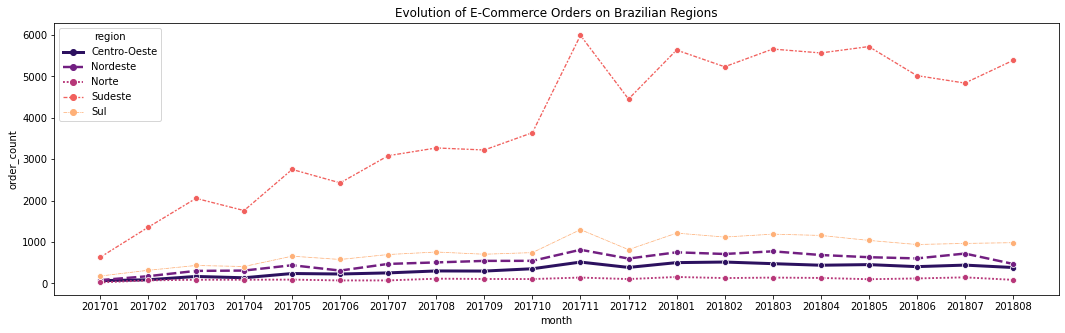

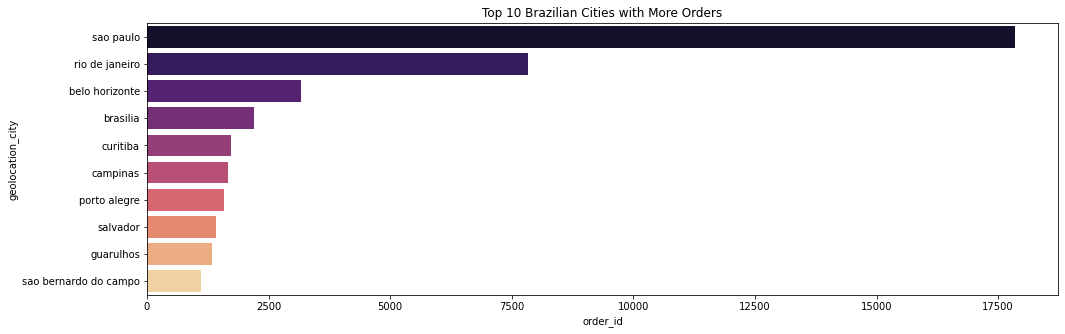

In [38]:
plt.figure(figsize=(18, 5))

# Count of orders by region
sns.lineplot(x='month', y='order_count', data=df_regions_group, hue='region', 
             size='region', style='region', palette='magma', markers=['o'] * 5)
plt.title('Evolution of E-Commerce Orders on Brazilian Regions')

plt.figure(figsize=(16.33, 5))

# Top cities with more customers orders in Brazil
sns.barplot(y='geolocation_city', x='order_id', data=df_cities_group, palette='magma')
plt.title('Top 10 Brazilian Cities with More Orders')

**How customers are distributed in Brazil**

In [39]:
# Zipping locations
lats = list(df_orders_items.query('order_purchase_year == 2018')['geolocation_lat'].dropna().values)[:30000]
longs = list(df_orders_items.query('order_purchase_year == 2018')['geolocation_lng'].dropna().values)[:30000]
locations = list(zip(lats, longs))

# Creating a mapa using folium
map1 = folium.Map(location=[-15, -50], zoom_start=4.0)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1

**Heatmaps**

In [40]:
# Grouping geolocation data for plotting a heatmap
heat_data = df_orders_filt.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count().iloc[:, :3]

# Creating a mapa using folium
map1 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMap
HeatMap(
    name='Mapa de Calor',
    data=heat_data,
    radius=10,
    max_zoom=13
).add_to(map1)

map1

# RFM Analysis

**Recency**

In [41]:
#Define current date (1 day after the last date in the dataset)
current_date = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days = 1)

#Show "current" date
print(f"Current date is: {current_date}")

Current date is: 2018-09-04 09:06:57


In [42]:
#Obtain the date of the most recent purchase in a new dataframe
recency_df = merged_df.groupby(['customer_unique_id'], as_index = False)['order_purchase_timestamp'].max()

#Show results
recency_df.head()

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [43]:
#Obtain recency value for each customer adding new column
recency_df['recency'] = recency_df['order_purchase_timestamp'].apply(lambda x: (current_date - x).days)

#Show results
recency_df.head()

,customer_unique_id,order_purchase_timestamp,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293


the time that has elapsed since a customer's last purchase

**Frequency**

In [44]:
#Obtain the number of unique orders by customer in a new dataframe
frequency_df = pd.DataFrame(merged_df.groupby(["customer_unique_id"], as_index = False).agg({"order_id":"nunique"}))

#Rename column to 'frequency'
frequency_df.rename(columns={"order_id":"frequency"}, inplace=True)

#Show results
frequency_df.head()

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


the number of times a client has made a purchase

**Monetary**

In [45]:
#Calculate payment value group by customer id in a new dataframe
monetary_df = merged_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()

#Rename 'payment value' column to 'monetary'
monetary_df.rename(columns={"payment_value":"monetary"}, inplace=True)

#Show results
monetary_df.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


how much money the customer has spent over a period of time

**Merge Dataframes**

In [46]:
#Merge dataframes
rfm_df = recency_df.merge(frequency_df, on='customer_unique_id')
rfm_df = rfm_df.merge(monetary_df, on='customer_unique_id')

rfm_df.head()

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,196.89


In [47]:
#Deleting date column because it's not necessary
rfm_df.drop(columns='order_purchase_timestamp', inplace = True)

#Show results
rfm_df.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89


merge recency, frequency, and monetary into one dataframe

**Distribution of values**

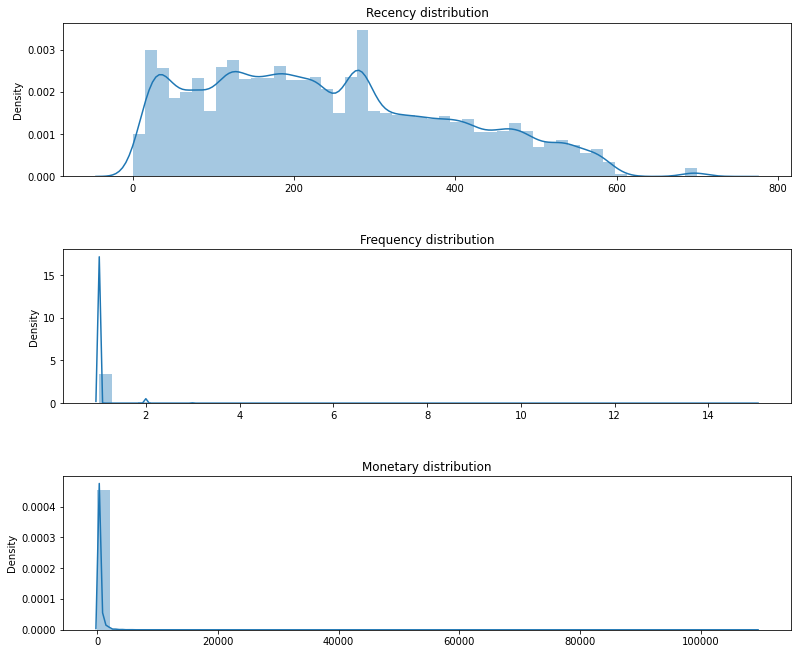

In [48]:
plt.figure(figsize=(12, 10))

#Recency
plt.subplot(3, 1, 1)
sns.distplot(rfm_df['recency'])
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfm_df['frequency'])
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
sns.distplot(rfm_df['monetary'])
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout(pad = 4)

It seems that there could be outliers in the dataframe

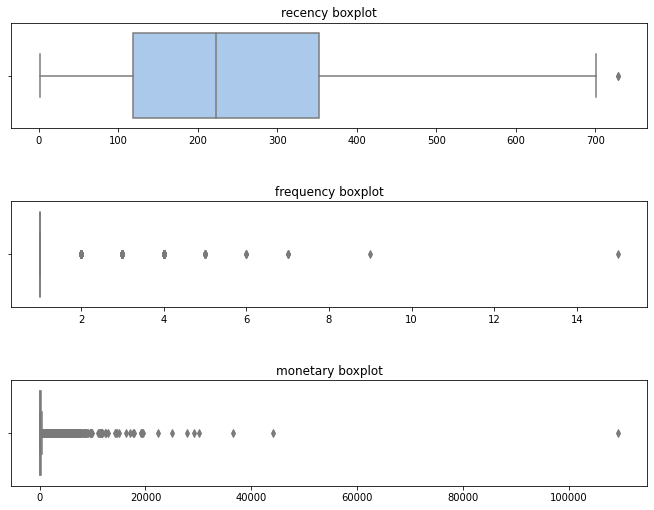

In [49]:
#Columns to examine
features = ['recency', 'frequency', 'monetary']

#Creating a boxplot for outlier detection
n = 1

plt.figure(figsize = (10, 8))

for feature in features:
    plt.subplot(3,1,n)
    sns.boxplot(rfm_df[feature], palette = 'pastel').set(xlabel = None)
    plt.title(f'{feature} boxplot')
    n = n + 1
    
plt.tight_layout(pad = 4)

There are outliers in the dataframe, especially in the monetary column

In [50]:
#Create function to delete extreme outliers
def remove_outlier(input_df, colum_name):
    q1 = input_df[colum_name].quantile(0.05)
    q3 = input_df[colum_name].quantile(0.95)
    iqr = q3-q1     
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers = input_df.loc[(input_df[colum_name] < fence_low) | (input_df[colum_name] > fence_high)].index
    input_df = pd.DataFrame(input_df.drop(index_outliers.to_list(), axis=0, inplace=True))
    return input_df

In [51]:
#Apply the function to the columns, except frequency column
for i in ["recency", "monetary"]:
    remove_outlier(rfm_df, i)

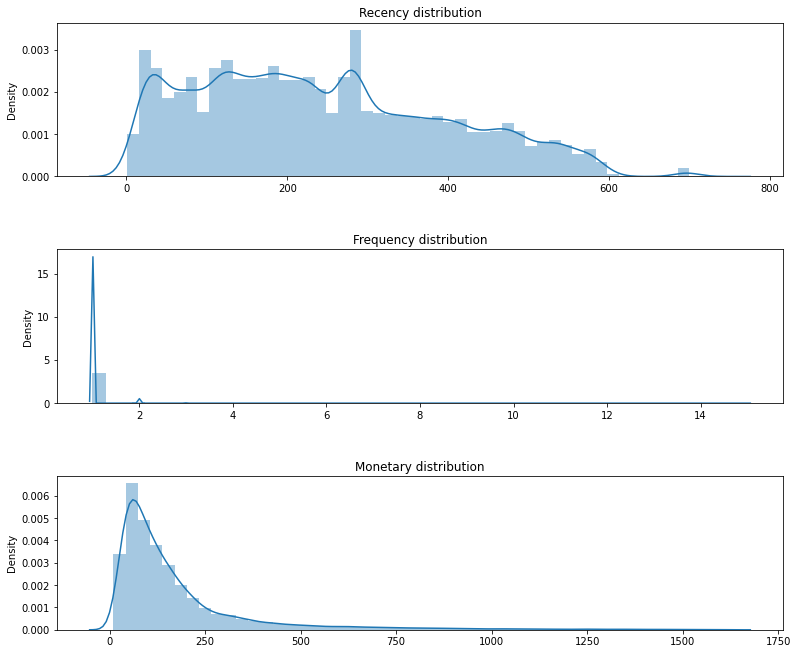

In [52]:
#Distribution plots after eliminating extreme outliers
plt.figure(figsize=(12, 10))

#Recency
plt.subplot(3, 1, 1)
sns.distplot(rfm_df['recency'])
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfm_df['frequency'])
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
sns.distplot(rfm_df['monetary'])
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout(pad = 4)

**RFM Score**

In [53]:
#Using qcut function to discretize variables into equal-sized buckets
rfm_df["recency_score"] = pd.qcut(rfm_df['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df["monetary_score"] = pd.qcut(rfm_df['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [54]:
rfm_df['frequency'].value_counts(normalize=True)*100

1     97.075352
2      2.707005
3      0.174331
4      0.028153
5      0.009745
6      0.002166
7      0.002166
15     0.001083
Name: frequency, dtype: float64

In [55]:
#Creating a function to parse values
def parse_values(x):
    switch = {
        1: 1,
        2: 2,
        3: 3,
        4: 4
    }
    return switch.get(x, 5)

In [56]:
#Apply function to create frequency_score column
rfm_df['frequency_score'] = rfm_df['frequency'].apply(parse_values)

In [57]:
#Concatenate all scores into one
rfm_df['rfm_score'] = rfm_df.recency_score.astype(str)+ rfm_df.frequency_score.astype(str) + rfm_df.monetary_score.astype(str)

#Show results
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,4,1,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,86.22,1,2,1,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,4,1,214


In [58]:
#Creating dictionary with scores and segment names
segments = {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

bloomreach segmentation model ([link to blog](https://documentation.bloomreach.com/engagement/docs/rfm-segmentation))

In [59]:
#Creating segment column
rfm_df['segment'] = rfm_df['rfm_score'].replace(segments, regex=True)

#Show results
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,4,1,414,Promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411,New Customers
2,0000f46a3911fa3c0805444483337064,542,1,86.22,1,2,1,112,Lost customers
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1,211,Hibernating customers
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,4,1,214,Cannot Lose Them


**Conclusion**

In [60]:
#Calculate some calculations grouping each segment
rfm_statistics = rfm_df[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(['mean','median', 'min', 'max', 'count'])

#Show results
rfm_statistics

recency                         frequency         \
                             mean median  min  max  count      mean median   
segment                                                                      
About To Sleep         273.697759  273.0  182  388   7183  1.000557    1.0   
At Risk                387.346405  372.0  274  697    765  2.083660    2.0   
Cannot Lose Them       416.725353  414.0  274  729  17233  1.000000    1.0   
Champions               87.680000   80.0   13  181     25  4.840000    4.0   
Hibernating customers  323.091267  319.0  182  606   7626  1.027800    1.0   
Lost customers         478.997764  472.0  389  729   7602  1.001184    1.0   
Loyal                  176.627119  174.0   99  273     59  3.237288    3.0   
Need Attention         207.847826  215.0    6  273    506  2.102767    2.0   
New Customers          121.871618  120.0    5  273  18219  1.002141    1.0   
Potential Loyalist     175.229730  174.5    7  273    148  2.033784    2.0   
Promising              136.589505  136.0    1  273  32987  1.028496    1.0   

                                        monetary                            \
                      min max  count        mean   median     min      max   
segment                                                                      
About To Sleep          1   2   7183   91.734880   88.720   39.34   138.41   
At Risk                 2   6    765  408.597320  301.350   73.48  1540.27   
Cannot Lose Them        1   1  17233  286.735354  197.680   88.91  1615.17   
Champions               4  15     25  792.682800  820.150  297.66  1590.76   
Hibernating customers   1   3   7626   57.630332   57.855   10.07   138.40   
Lost customers          1   3   7602   55.785687   55.690   12.28    88.84   
Loyal                   3   7     59  641.900508  470.930  234.76  1600.70   
Need Attention          2   3    506  386.800573  295.100  140.34  1611.30   
New Customers           1   2  18219   51.959571   49.450    9.59    88.90   
Potential Loyalist      2   3    148  116.354662  116.585   88.27   138.26   
Promising               1   2  32987  253.697155  171.980   37.34  1610.50   

                              
                       count  
segment                       
About To Sleep          7183  
At Risk                  765  
Cannot Lose Them       17233  
Champions                 25  
Hibernating customers   7626  
Lost customers          7602  
Loyal                     59  
Need Attention           506  
New Customers          18219  
Potential Loyalist       148  
Promising              32987

In [61]:
#Creating new column with percentage of customers by segment
rfm_statistics['ratio'] = (100 * rfm_statistics['recency']["count"]/rfm_statistics['recency']["count"].sum()).round(2)

#Show results
rfm_statistics

recency                         frequency         \
                             mean median  min  max  count      mean median   
segment                                                                      
About To Sleep         273.697759  273.0  182  388   7183  1.000557    1.0   
At Risk                387.346405  372.0  274  697    765  2.083660    2.0   
Cannot Lose Them       416.725353  414.0  274  729  17233  1.000000    1.0   
Champions               87.680000   80.0   13  181     25  4.840000    4.0   
Hibernating customers  323.091267  319.0  182  606   7626  1.027800    1.0   
Lost customers         478.997764  472.0  389  729   7602  1.001184    1.0   
Loyal                  176.627119  174.0   99  273     59  3.237288    3.0   
Need Attention         207.847826  215.0    6  273    506  2.102767    2.0   
New Customers          121.871618  120.0    5  273  18219  1.002141    1.0   
Potential Loyalist     175.229730  174.5    7  273    148  2.033784    2.0   
Promising              136.589505  136.0    1  273  32987  1.028496    1.0   

                                        monetary                            \
                      min max  count        mean   median     min      max   
segment                                                                      
About To Sleep          1   2   7183   91.734880   88.720   39.34   138.41   
At Risk                 2   6    765  408.597320  301.350   73.48  1540.27   
Cannot Lose Them        1   1  17233  286.735354  197.680   88.91  1615.17   
Champions               4  15     25  792.682800  820.150  297.66  1590.76   
Hibernating customers   1   3   7626   57.630332   57.855   10.07   138.40   
Lost customers          1   3   7602   55.785687   55.690   12.28    88.84   
Loyal                   3   7     59  641.900508  470.930  234.76  1600.70   
Need Attention          2   3    506  386.800573  295.100  140.34  1611.30   
New Customers           1   2  18219   51.959571   49.450    9.59    88.90   
Potential Loyalist      2   3    148  116.354662  116.585   88.27   138.26   
Promising               1   2  32987  253.697155  171.980   37.34  1610.50   

                              ratio  
                       count         
segment                              
About To Sleep          7183   7.78  
At Risk                  765   0.83  
Cannot Lose Them       17233  18.66  
Champions                 25   0.03  
Hibernating customers   7626   8.26  
Lost customers          7602   8.23  
Loyal                     59   0.06  
Need Attention           506   0.55  
New Customers          18219  19.73  
Potential Loyalist       148   0.16  
Promising              32987  35.72

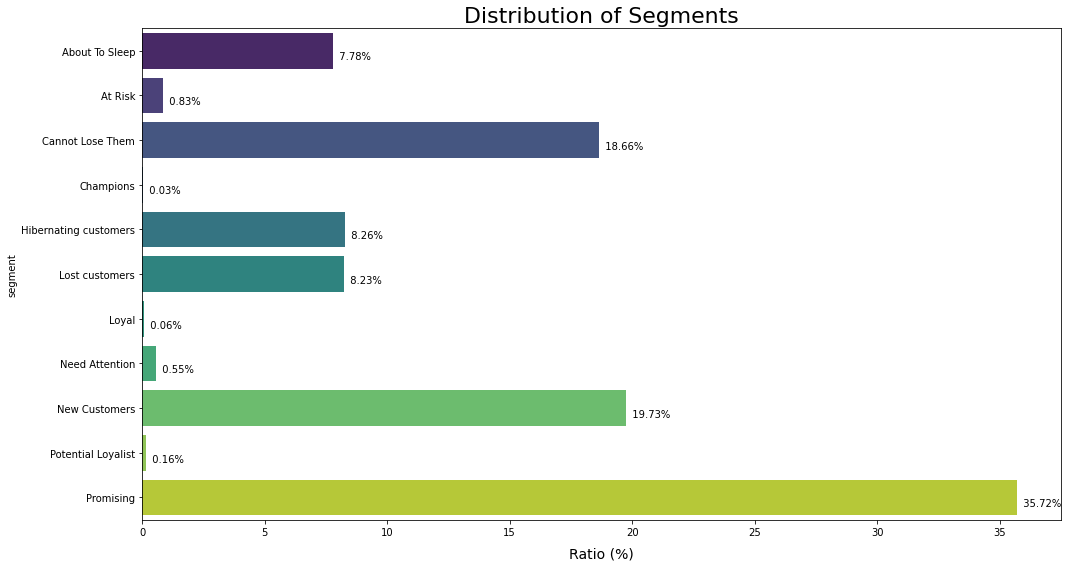

In [62]:
#Plot ratio column
plt.figure(figsize=(15,8))

plot = sns.barplot(x = 'ratio', y = rfm_statistics.index, data = rfm_statistics, palette = "viridis")

for i, v in enumerate(rfm_statistics['ratio']):
    plot.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")

plt.title('Distribution of Segments', fontsize=22)
plt.xlabel('Ratio (%)', fontsize=14, labelpad = 10)
plt.tight_layout()

# Machine Learning Models

**Merge Datasets**

In [63]:
# Prepare dataset
cust_new = customers.iloc[:,[0, 1, 3]]
orders_new = orders.iloc[:,[0, 1, 2, 3, 4, 7]]
order_items_new = order_items.iloc[:,[0, 1, 2, 3, 5, 6]]
products_new = products.iloc[:, [0,1]]
sellers_new = sellers.iloc[:,[0, 2]]
payments = order_payments.iloc[:,[0, 2, 4]]

# Merge data
data1 = cust_new.merge(orders_new, on='customer_id')
data2 = order_items_new.merge(products_new, on='product_id')
data3 = data2.merge(sellers_new, on='seller_id')
data4 = data1.merge(data3, on='order_id')
new_dataset = data4.merge(payments, on='order_id')
new_dataset.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,freight_value,product_category_name,seller_city,payment_type,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,moveis_escritorio,itaquaquecetuba,credit_card,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,utilidades_domesticas,itajai,credit_card,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,moveis_escritorio,itaquaquecetuba,credit_card,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,moveis_escritorio,itaquaquecetuba,credit_card,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,casa_conforto,ibitinga,credit_card,252.25


In [64]:
# Drop duplicates on order item id
new_dataset = new_dataset.sort_values(by='order_item_id', ascending=False).drop_duplicates('order_id')

In [65]:
# Deal with null values
new_dataset['product_category_name'].fillna(value='unknown category',axis=0, inplace=True)
new_dataset.dropna(axis=0, inplace=True)

**Create Features**

In [66]:
# Add columns based on time from order_purchase_timestamp
new_dataset['order_purchase_timestamp'] = pd.to_datetime(new_dataset['order_purchase_timestamp'])

new_dataset['year'] = new_dataset['order_purchase_timestamp'].dt.year
new_dataset['month'] = new_dataset['order_purchase_timestamp'].dt.month
new_dataset['month_year'] = new_dataset['order_purchase_timestamp'].dt.to_period('M')
new_dataset['day_of_week'] = new_dataset['order_purchase_timestamp'].dt.dayofweek

day_name = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
new_dataset['day_name'] = new_dataset['day_of_week'].map(day_name)
new_dataset['hour'] = new_dataset['order_purchase_timestamp'].dt.hour

In [67]:
# Create freight value percentage
new_dataset['freight_value_percentage'] = new_dataset['freight_value']/new_dataset['payment_value']*100
new_dataset.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,payment_type,payment_value,year,month,month_year,day_of_week,day_name,hour,freight_value_percentage
55771,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,sao paulo,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-28 00:00:00,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,...,sao paulo,credit_card,196.11,2017,7,2017-07,6,Sunday,18,3.350161
85521,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,goiania,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-23 09:22:34,2017-08-24 14:30:23,2017-09-21 00:00:00,20,9571759451b1d780ee7c15012ea109d4,...,sao paulo,credit_card,2262.80,2017,8,2017-08,2,Wednesday,9,0.638147
20915,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,sao paulo,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-08 00:00:00,20,ee3d532c8a438679776d222e997606b3,...,sao jose dos campos,boleto,2202.40,2018,2,2018-02,3,Thursday,15,0.459499
8331,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,goiania,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 21:44:49,2017-01-30 22:33:45,2017-03-07 00:00:00,15,37eb69aca8718e843d897aa7b82f462d,...,jaragua do sul,credit_card,783.00,2017,1,2017-01,0,Monday,21,0.153257
92779,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,uniao da vitoria,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-23 20:30:52,2017-11-24 10:31:10,2017-12-19 00:00:00,15,89b190a046022486c635022524a974a8,...,fernandopolis,credit_card,1225.65,2017,11,2017-11,3,Thursday,20,1.323379


In [68]:
# Create total orders item
new_dataset["total_orders_item"] = new_dataset.groupby('seller_id')["order_item_id"].transform('sum')
new_dataset.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,...,payment_type,payment_value,year,month,month_year,day_of_week,day_name,hour,freight_value_percentage,total_orders_item
55771,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,sao paulo,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-28 00:00:00,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,...,credit_card,196.11,2017,7,2017-07,6,Sunday,18,3.350161,48
85521,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,goiania,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-23 09:22:34,2017-08-24 14:30:23,2017-09-21 00:00:00,20,9571759451b1d780ee7c15012ea109d4,...,credit_card,2262.80,2017,8,2017-08,2,Wednesday,9,0.638147,164
20915,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,sao paulo,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-08 00:00:00,20,ee3d532c8a438679776d222e997606b3,...,boleto,2202.40,2018,2,2018-02,3,Thursday,15,0.459499,137
8331,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,goiania,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 21:44:49,2017-01-30 22:33:45,2017-03-07 00:00:00,15,37eb69aca8718e843d897aa7b82f462d,...,credit_card,783.00,2017,1,2017-01,0,Monday,21,0.153257,15
92779,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,uniao da vitoria,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-23 20:30:52,2017-11-24 10:31:10,2017-12-19 00:00:00,15,89b190a046022486c635022524a974a8,...,credit_card,1225.65,2017,11,2017-11,3,Thursday,20,1.323379,30


In [69]:
# Create total seller income
new_dataset["total_seller_income"]=new_dataset.groupby('seller_id')["price"].transform('sum')
new_dataset.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,...,payment_value,year,month,month_year,day_of_week,day_name,hour,freight_value_percentage,total_orders_item,total_seller_income
55771,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,sao paulo,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-28 00:00:00,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,...,196.11,2017,7,2017-07,6,Sunday,18,3.350161,48,1211.56
85521,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,goiania,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-23 09:22:34,2017-08-24 14:30:23,2017-09-21 00:00:00,20,9571759451b1d780ee7c15012ea109d4,...,2262.80,2017,8,2017-08,2,Wednesday,9,0.638147,164,8219.59
20915,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,sao paulo,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-08 00:00:00,20,ee3d532c8a438679776d222e997606b3,...,2202.40,2018,2,2018-02,3,Thursday,15,0.459499,137,9827.11
8331,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,goiania,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 21:44:49,2017-01-30 22:33:45,2017-03-07 00:00:00,15,37eb69aca8718e843d897aa7b82f462d,...,783.00,2017,1,2017-01,0,Monday,21,0.153257,15,51.00
92779,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,uniao da vitoria,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-23 20:30:52,2017-11-24 10:31:10,2017-12-19 00:00:00,15,89b190a046022486c635022524a974a8,...,1225.65,2017,11,2017-11,3,Thursday,20,1.323379,30,1788.64


In [70]:
# Create total seller city
new_dataset["total_seller_city"]=new_dataset.groupby('seller_city')["order_item_id"].transform(sum)
new_dataset.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,...,year,month,month_year,day_of_week,day_name,hour,freight_value_percentage,total_orders_item,total_seller_income,total_seller_city
55771,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,sao paulo,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-28 00:00:00,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,...,2017,7,2017-07,6,Sunday,18,3.350161,48,1211.56,27927
85521,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,goiania,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-23 09:22:34,2017-08-24 14:30:23,2017-09-21 00:00:00,20,9571759451b1d780ee7c15012ea109d4,...,2017,8,2017-08,2,Wednesday,9,0.638147,164,8219.59,27927
20915,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,sao paulo,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-08 00:00:00,20,ee3d532c8a438679776d222e997606b3,...,2018,2,2018-02,3,Thursday,15,0.459499,137,9827.11,815
8331,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,goiania,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 21:44:49,2017-01-30 22:33:45,2017-03-07 00:00:00,15,37eb69aca8718e843d897aa7b82f462d,...,2017,1,2017-01,0,Monday,21,0.153257,15,51.00,209
92779,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,uniao da vitoria,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-23 20:30:52,2017-11-24 10:31:10,2017-12-19 00:00:00,15,89b190a046022486c635022524a974a8,...,2017,11,2017-11,3,Thursday,20,1.323379,30,1788.64,108


In [71]:
# Create total product by category
new_dataset["total_product_category"]=new_dataset.groupby('product_category_name')["order_item_id"].transform(sum)
new_dataset.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,...,month,month_year,day_of_week,day_name,hour,freight_value_percentage,total_orders_item,total_seller_income,total_seller_city,total_product_category
55771,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,sao paulo,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-28 00:00:00,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,...,7,2017-07,6,Sunday,18,3.350161,48,1211.56,27927,9674
85521,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,goiania,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-23 09:22:34,2017-08-24 14:30:23,2017-09-21 00:00:00,20,9571759451b1d780ee7c15012ea109d4,...,8,2017-08,2,Wednesday,9,0.638147,164,8219.59,27927,4218
20915,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,sao paulo,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-08 00:00:00,20,ee3d532c8a438679776d222e997606b3,...,2,2018-02,3,Thursday,15,0.459499,137,9827.11,815,7832
8331,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,goiania,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 21:44:49,2017-01-30 22:33:45,2017-03-07 00:00:00,15,37eb69aca8718e843d897aa7b82f462d,...,1,2017-01,0,Monday,21,0.153257,15,51.00,209,4334
92779,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,uniao da vitoria,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-23 20:30:52,2017-11-24 10:31:10,2017-12-19 00:00:00,15,89b190a046022486c635022524a974a8,...,11,2017-11,3,Thursday,20,1.323379,30,1788.64,108,8294


In [72]:
# Create average product by category
new_dataset["avg_product_category"]=new_dataset.groupby('product_category_name')["payment_value"].transform('mean')
new_dataset.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,...,month_year,day_of_week,day_name,hour,freight_value_percentage,total_orders_item,total_seller_income,total_seller_city,total_product_category,avg_product_category
55771,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,sao paulo,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-28 00:00:00,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,...,2017-07,6,Sunday,18,3.350161,48,1211.56,27927,9674,161.785572
85521,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,goiania,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-23 09:22:34,2017-08-24 14:30:23,2017-09-21 00:00:00,20,9571759451b1d780ee7c15012ea109d4,...,2017-08,2,Wednesday,9,0.638147,164,8219.59,27927,4218,173.208551
20915,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,sao paulo,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-08 00:00:00,20,ee3d532c8a438679776d222e997606b3,...,2018-02,3,Thursday,15,0.459499,137,9827.11,815,7832,157.228849
8331,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,goiania,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 21:44:49,2017-01-30 22:33:45,2017-03-07 00:00:00,15,37eb69aca8718e843d897aa7b82f462d,...,2017-01,0,Monday,21,0.153257,15,51.00,209,4334,165.606792
92779,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,uniao da vitoria,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-23 20:30:52,2017-11-24 10:31:10,2017-12-19 00:00:00,15,89b190a046022486c635022524a974a8,...,2017-11,3,Thursday,20,1.323379,30,1788.64,108,8294,139.791662


In [73]:
# Create total customer by city
new_dataset["total_customer_city"]=new_dataset.groupby('customer_city')["order_item_id"].transform(sum)

In [74]:
# Final dataset
new_dataset.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,...,day_of_week,day_name,hour,freight_value_percentage,total_orders_item,total_seller_income,total_seller_city,total_product_category,avg_product_category,total_customer_city
55771,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,sao paulo,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-28 00:00:00,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,...,6,Sunday,18,3.350161,48,1211.56,27927,9674,161.785572,17806
85521,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,goiania,ab14fdcfbe524636d65ee38360e22ce8,delivered,2017-08-23 09:22:34,2017-08-24 14:30:23,2017-09-21 00:00:00,20,9571759451b1d780ee7c15012ea109d4,...,2,Wednesday,9,0.638147,164,8219.59,27927,4218,173.208551,817
20915,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,sao paulo,1b15974a0141d54e36626dca3fdc731a,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-08 00:00:00,20,ee3d532c8a438679776d222e997606b3,...,3,Thursday,15,0.459499,137,9827.11,815,7832,157.228849,17806
8331,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,goiania,9ef13efd6949e4573a18964dd1bbe7f5,delivered,2017-01-30 21:44:49,2017-01-30 22:33:45,2017-03-07 00:00:00,15,37eb69aca8718e843d897aa7b82f462d,...,0,Monday,21,0.153257,15,51.00,209,4334,165.606792,817
92779,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,uniao da vitoria,428a2f660dc84138d969ccd69a0ab6d5,delivered,2017-11-23 20:30:52,2017-11-24 10:31:10,2017-12-19 00:00:00,15,89b190a046022486c635022524a974a8,...,3,Thursday,20,1.323379,30,1788.64,108,8294,139.791662,47


**Feature Engineering for Churn Prediction**

In [75]:
# Merge dataset with RFM dataframe from RFM Analysis
new_dataset = new_dataset.merge(rfm_df, on = 'customer_unique_id')
new_dataset.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,...,avg_product_category,total_customer_city,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score,segment
0,64ece241ae357ffb4989f7970a6f6adf,0097fca0db567f5ca79509b7b4fc1c2d,sao paulo,9bdf94af058f959fbc09c3ea1eb32465,delivered,2018-04-19 11:17:55,2018-04-19 11:49:24,2018-05-08 00:00:00,7,acebea1efbaa063642166633d247aec7,...,139.791662,17806,137,1,1593.41,4,5,1,415,Promising
1,1205480caca6c37f55954da838933b8a,bf869f6a89c8ba217f47e22359f884f2,santos,77df84f9195be22a4e9cb72ca9e8b4c2,delivered,2018-08-16 04:29:53,2018-08-16 04:44:00,2018-09-18 00:00:00,7,8ccaa3f8b171b199e37294ece30815a3,...,139.791662,819,19,1,1466.99,5,5,1,515,Promising
2,6c7aa7f4eee619102606e20914da066a,b18c8cbd9616a95055ef4146f3f805e1,sao paulo,487e6e67e10e5756f886f5994439c22f,delivered,2018-06-04 15:29:14,2018-06-04 15:51:50,2018-07-05 00:00:00,7,7cefa61c9500d9b227894dc48d8b5a0b,...,131.113921,17806,91,2,1474.93,5,5,2,525,Promising
3,b40bc204d9bccb87d0afa5cefba3514b,b18c8cbd9616a95055ef4146f3f805e1,sao paulo,1d85f2f091ba615cbd003bf7d3edc703,delivered,2018-04-10 14:09:05,2018-04-10 14:30:11,2018-04-26 00:00:00,2,0e14941c183946f60e3b86585d05f984,...,131.113921,17806,91,2,1474.93,5,5,2,525,Promising
4,0b42763d66e65a34f6e2978facaf93da,b2e9a05d23ea17713b5d7799f2004f8e,sao paulo,a92bb0beb3fd226d50671cf17587f289,delivered,2018-07-26 14:26:07,2018-07-27 02:15:27,2018-08-07 00:00:00,6,2fb9e46750ac55362f7b642f12b5835b,...,157.228849,17806,37,3,1499.12,5,5,3,535,Need Attention


In [76]:
# Create churn column (customer who hasn't made purchase more than 365 days)
new_dataset['is_churn'] = new_dataset['recency'].apply(lambda x: True if x >= 365 else False)
new_dataset['is_churn'].value_counts()
new_dataset.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,...,total_customer_city,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score,segment,is_churn
0,64ece241ae357ffb4989f7970a6f6adf,0097fca0db567f5ca79509b7b4fc1c2d,sao paulo,9bdf94af058f959fbc09c3ea1eb32465,delivered,2018-04-19 11:17:55,2018-04-19 11:49:24,2018-05-08 00:00:00,7,acebea1efbaa063642166633d247aec7,...,17806,137,1,1593.41,4,5,1,415,Promising,False
1,1205480caca6c37f55954da838933b8a,bf869f6a89c8ba217f47e22359f884f2,santos,77df84f9195be22a4e9cb72ca9e8b4c2,delivered,2018-08-16 04:29:53,2018-08-16 04:44:00,2018-09-18 00:00:00,7,8ccaa3f8b171b199e37294ece30815a3,...,819,19,1,1466.99,5,5,1,515,Promising,False
2,6c7aa7f4eee619102606e20914da066a,b18c8cbd9616a95055ef4146f3f805e1,sao paulo,487e6e67e10e5756f886f5994439c22f,delivered,2018-06-04 15:29:14,2018-06-04 15:51:50,2018-07-05 00:00:00,7,7cefa61c9500d9b227894dc48d8b5a0b,...,17806,91,2,1474.93,5,5,2,525,Promising,False
3,b40bc204d9bccb87d0afa5cefba3514b,b18c8cbd9616a95055ef4146f3f805e1,sao paulo,1d85f2f091ba615cbd003bf7d3edc703,delivered,2018-04-10 14:09:05,2018-04-10 14:30:11,2018-04-26 00:00:00,2,0e14941c183946f60e3b86585d05f984,...,17806,91,2,1474.93,5,5,2,525,Promising,False
4,0b42763d66e65a34f6e2978facaf93da,b2e9a05d23ea17713b5d7799f2004f8e,sao paulo,a92bb0beb3fd226d50671cf17587f289,delivered,2018-07-26 14:26:07,2018-07-27 02:15:27,2018-08-07 00:00:00,6,2fb9e46750ac55362f7b642f12b5835b,...,17806,37,3,1499.12,5,5,3,535,Need Attention,False


In [77]:
# Change churn column to int
new_dataset['is_churn'] = new_dataset['is_churn'].astype(int)
new_dataset.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,...,total_customer_city,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score,segment,is_churn
0,64ece241ae357ffb4989f7970a6f6adf,0097fca0db567f5ca79509b7b4fc1c2d,sao paulo,9bdf94af058f959fbc09c3ea1eb32465,delivered,2018-04-19 11:17:55,2018-04-19 11:49:24,2018-05-08 00:00:00,7,acebea1efbaa063642166633d247aec7,...,17806,137,1,1593.41,4,5,1,415,Promising,0
1,1205480caca6c37f55954da838933b8a,bf869f6a89c8ba217f47e22359f884f2,santos,77df84f9195be22a4e9cb72ca9e8b4c2,delivered,2018-08-16 04:29:53,2018-08-16 04:44:00,2018-09-18 00:00:00,7,8ccaa3f8b171b199e37294ece30815a3,...,819,19,1,1466.99,5,5,1,515,Promising,0
2,6c7aa7f4eee619102606e20914da066a,b18c8cbd9616a95055ef4146f3f805e1,sao paulo,487e6e67e10e5756f886f5994439c22f,delivered,2018-06-04 15:29:14,2018-06-04 15:51:50,2018-07-05 00:00:00,7,7cefa61c9500d9b227894dc48d8b5a0b,...,17806,91,2,1474.93,5,5,2,525,Promising,0
3,b40bc204d9bccb87d0afa5cefba3514b,b18c8cbd9616a95055ef4146f3f805e1,sao paulo,1d85f2f091ba615cbd003bf7d3edc703,delivered,2018-04-10 14:09:05,2018-04-10 14:30:11,2018-04-26 00:00:00,2,0e14941c183946f60e3b86585d05f984,...,17806,91,2,1474.93,5,5,2,525,Promising,0
4,0b42763d66e65a34f6e2978facaf93da,b2e9a05d23ea17713b5d7799f2004f8e,sao paulo,a92bb0beb3fd226d50671cf17587f289,delivered,2018-07-26 14:26:07,2018-07-27 02:15:27,2018-08-07 00:00:00,6,2fb9e46750ac55362f7b642f12b5835b,...,17806,37,3,1499.12,5,5,3,535,Need Attention,0


**Machine Learning Models**

In [78]:
# Prepare dataset
X = new_dataset.iloc[:,[11, 12, 16, 23, 24, 25, 26, 27, 28, 29, 30]]
X.head()

,price,freight_value,payment_value,freight_value_percentage,total_orders_item,total_seller_income,total_seller_city,total_product_category,avg_product_category,total_customer_city,recency
0,18.04,8.54,227.63,3.751702,21,616.57,2367,8294,139.791662,17806,137
1,18.90,3.28,209.57,1.565110,32,1693.36,930,8294,139.791662,819,19
2,14.50,6.10,198.11,3.079097,27,691.90,2367,6962,131.113921,17806,91
3,14.80,7.39,44.08,16.764973,27,691.90,2367,6962,131.113921,17806,91
4,15.00,7.39,134.34,5.500968,9,89.90,9,7832,157.228849,17806,37


In [79]:
# Churn as prediction target
y = new_dataset['is_churn'].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [80]:
# Check the inf values
np.where(X.values >= np.finfo(np.float64).max) 

(array([55754]), array([3]))

In [81]:
#find max value of column
max_value = np.nanmax(X['freight_value_percentage'][X['freight_value_percentage'] != np.inf])

#replace inf and -inf in column with max value of column 
X['freight_value_percentage'].replace([np.inf, -np.inf], max_value, inplace=True)

In [82]:
# Scaling the data
Scaler = StandardScaler()
X = Scaler.fit_transform(X)
X

array([[-0.68947119, -0.75945862,  0.53226683, ..., -0.27394447,
         2.21268309, -0.68747704],
       [-0.68356069, -1.10947926,  0.41503116, ..., -0.27394447,
        -0.45452354, -1.45926949],
       [-0.71380044, -0.92182561,  0.34063909, ..., -0.40914257,
         2.21268309, -0.98834529],
       ...,
       [ 5.91488901,  0.29725767,  5.56827226, ...,  1.10682555,
        -0.57919312,  1.24854469],
       [ 0.56101097, -0.73017933,  0.41113629, ...,  1.10682555,
        -0.47273724, -1.21072616],
       [-0.7173055 , -0.81003195, -0.80406398, ..., -0.23451773,
        -0.53962545,  0.10393725]])

In [83]:
# Split to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create the model

In [84]:
def apply_model(model1):
    model = model1
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, cv = 6)
    precision = precision_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print ('Train score of '+str(model1)[:-2]+' is', score.mean(),'%')
    print ('--')
    print ('Precision score is ', precision)
    print ('--')
    print ('ROC Score is', roc)
    print ('--')
    print ('Recall Score is ', recall)
    print ('--')
    print ('Confusion Matrix\n\n', cm)

Logistics Regression

In [85]:
apply_model(LogisticRegression())

Train score of LogisticRegression is 0.999462914930965 %
--
Precision score is  0.9984047402005469
--
ROC Score is 0.9990780337494998
--
Recall Score is  0.9986323227718259
--
Confusion Matrix

 [[14691     7]
 [    6  4381]]


Gaussian Naive Bayes

In [86]:
apply_model(GaussianNB())

Train score of GaussianNB is 0.9172757997327675 %
--
Precision score is  0.9964838255977496
--
ROC Score is 0.8226595897160623
--
Recall Score is  0.6459995441075906
--
Confusion Matrix

 [[14688    10]
 [ 1553  2834]]


K-Neighbors Classifier

In [87]:
apply_model(KNeighborsClassifier())

Train score of KNeighborsClassifier is 0.9798265608216091 %
--
Precision score is  0.968421052631579
--
ROC Score is 0.9672561821606862
--
Recall Score is  0.9436972874401641
--
Confusion Matrix

 [[14563   135]
 [  247  4140]]


SGDC Classifier

In [88]:
apply_model(SGDClassifier())

Train score of SGDClassifier is 0.9958998139851712 %
--
Precision score is  0.9952305246422893
--
ROC Score is 0.9987157515790214
--
Recall Score is  0.9988602689765216
--
Confusion Matrix

 [[14677    21]
 [    5  4382]]


SVM Classifier

In [89]:
apply_model(SVC())

Train score of SVC is 0.9962928030600748 %
--
Precision score is  0.99609375
--
ROC Score is 0.9934950887037658
--
Recall Score is  0.988146797355824
--
Confusion Matrix

 [[14681    17]
 [   52  4335]]


Hyperparameter Tuning (Logistic Regression)

Using Logistic Regression as algorithm to do Cross Validation since it has the best perfomance

In [90]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.025,0.05, 0.055, 0.07, 0.08],
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, scoring = 'accuracy',cv = 6)
grid_log_reg.fit(X_train, y_train)
y_pred = grid_log_reg.predict(X_test)
best_score = grid_log_reg.best_score_
best_params = grid_log_reg.best_params_
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print ('Best Score is',best_score * 100)
print ('--')
print ('Best Parameters is', best_params)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)

Best Score is 99.99345018208494
--
Best Parameters is {'C': 0.055, 'penalty': 'l1', 'solver': 'liblinear'}
--
ROC Score is 0.99989794529868
--
Recall Score is  1.0
--
Confusion Matrix

 [[14695     3]
 [    0  4387]]


Logistic Regression could classify Churn with 100% accuracy

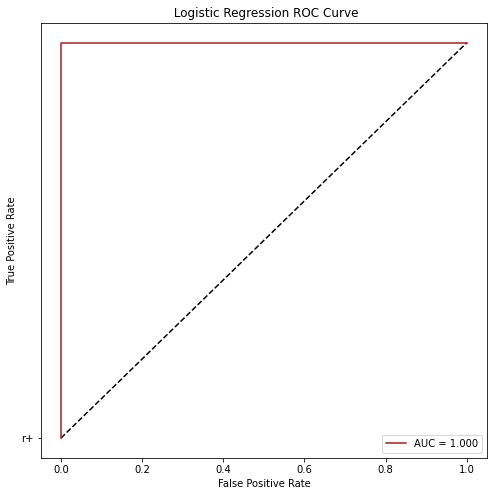

In [91]:
y_pred_prob = grid_log_reg.predict_proba(X_test)[:,1]

# instantiating the roc_curve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.figure(figsize = (8, 8))
plt.plot([0,1],[0,1],"k--",'r+')
figsize=(16,12)
plt.plot(fpr,tpr,color = '#b01717', label = 'AUC = %0.3f' % roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" Logistic Regression ROC Curve")
plt.legend()
plt.show()

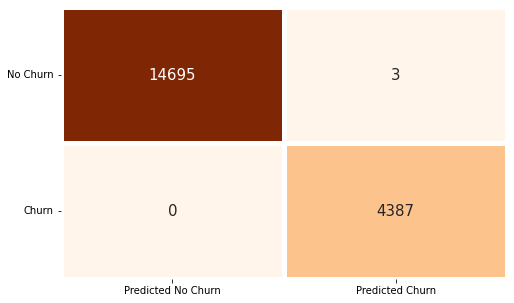

In [92]:
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Oranges', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Churn', 'Churn'], xticklabels = ['Predicted No Churn', 'Predicted Churn'])
plt.yticks(rotation = 0)
plt.show()

**User Segmentation**

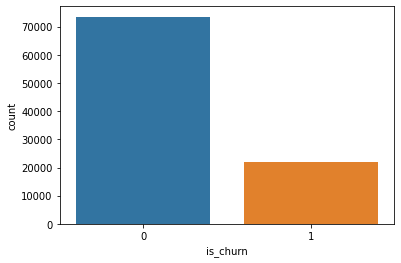

Churn Percentages are
 0    0.770286
1    0.229714
Name: is_churn, dtype: float64


In [93]:
sns.countplot(new_dataset.is_churn)
plt.show()
print ('Churn Percentages are\n',new_dataset.is_churn.value_counts() / new_dataset.is_churn.count())

<AxesSubplot: xlabel='year', ylabel='count'>

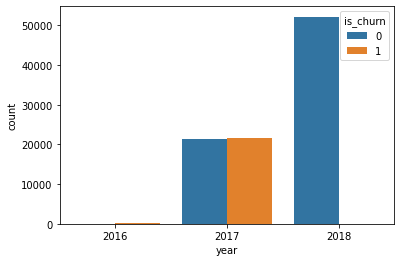

In [94]:
sns.countplot(x='year', hue='is_churn', data=new_dataset)

2017 has the highest Churn

<AxesSubplot: xlabel='order_status', ylabel='count'>

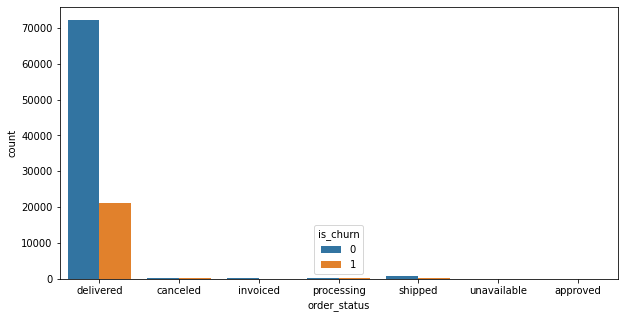

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x='order_status', hue='is_churn', data=new_dataset)

Delivered status has the highest Churn and Non-Churn

<AxesSubplot: >

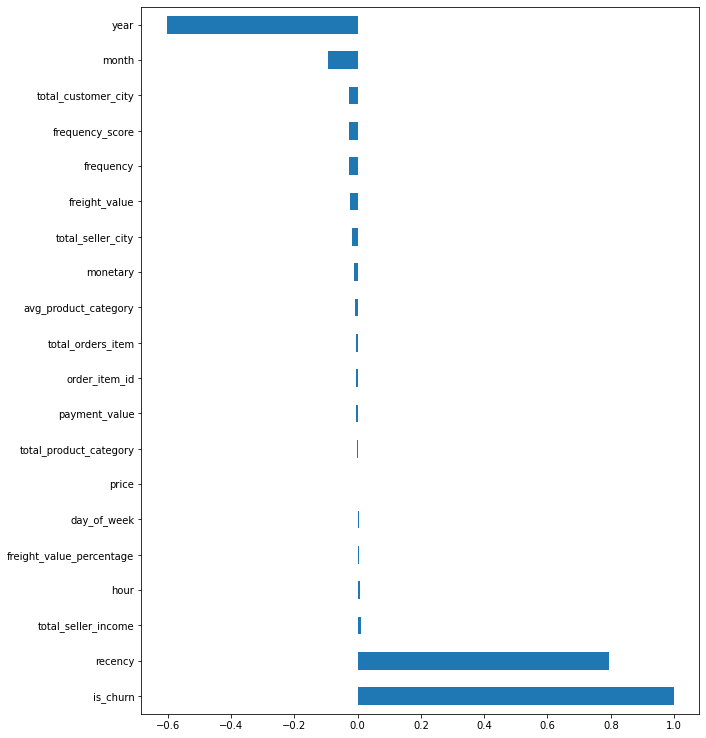

In [96]:
plt.figure(figsize=(10,13))
new_dataset.corr()['is_churn'].sort_values(ascending = False).plot(kind='barh')